In [1]:
from PIL import Image
from PIL import ImageChops
import os
import tifffile as tiff
import numpy as np
from tqdm import tqdm,trange

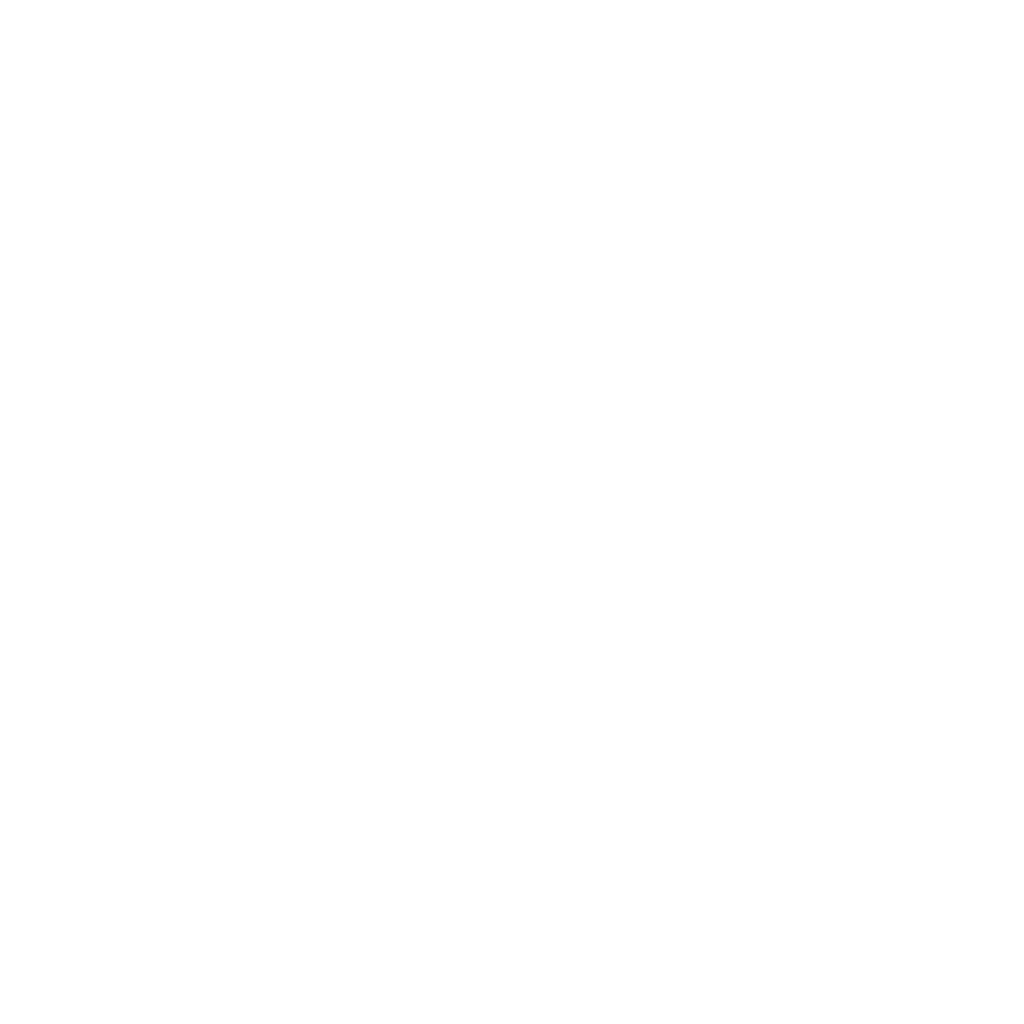

In [2]:
def log_x_y(x,y):
    return np.log(y)/np.log(x)


#生成有噪音的夜晚
def gen_night():
    img = np.random.randint(0,64,[1,1080,1920,3])
#     img = np.random.choice(list(range(128))+list(range(64))*5,[1,1080,1920,3])
    img.mean(0)
    img = img.mean(0).astype('uint8')
    img_alpha = np.ones([1080,1920,1])*255
    img_alpha = img_alpha.astype('uint8')
    img = np.concatenate((img,img_alpha),2)
    img = Image.fromarray(img)
    return img  

#生成星星+有噪音的夜晚
def gen_starry(star_num=200):
    img_circle = gen_night()
    star = Image.open('stars_gen.png')
    img_circle.paste(star,(0,0),mask=star.split()[3])
    return img_circle

#生成星星
def gen_star(star_num=200,colorful = True):
    img_circle = Image.fromarray(np.zeros([1080,1920,4]).astype(np.uint8))
    for i in range(star_num):
        width,height = img_circle.size
        star = Image.open('star_gen.png')
        if colorful == True:
            star = np.array(star)
            star[:,:,:3] = star[:,:,:3] / 255 * np.random.randint(200,255,[1,1,3])
            star.astype(np.uint8)
            star = Image.fromarray(star)
        star_size = np.random.randint(1,10)
        star = star.resize((star_size,star_size))
        loc_x = np.random.randint(0 + star_size,width - star_size*2)
        loc_y = np.random.randint(0 + star_size,height - star_size*2)    
        img_circle.paste(star,(loc_x,loc_y),mask=star.split()[3])
    img_circle.save('stars_gen.png')
    return img_circle

#保存一张画出来的星星
def sava_a_star():
    one_star = np.ones([1024,1024,4])*255
    for i in range(1024):
        for j in range(1024):
            distance = ((i-511)**2+(j-511)**2)/511**2
            if distance > 1:
                value = 0
            else:
                value = (-1*distance**2+1)*255
            one_star[i,j,3] = value 
    star_RGBA = Image.fromarray(one_star.astype(np.uint8))
    star_RGBA.save('star_gen.png')
    return star_RGBA
sava_a_star()

In [ ]:
# 黑夜 lighter
final_img = gen_night()
for i in trange(100):
    final_img = ImageChops.lighter(final_img,gen_night())
final_img

In [ ]:
# 黑夜 mean
final_img = np.array([np.array(gen_night()) for i in trange(100)])
final_img = np.mean(final_img,0)
final_img = final_img.astype(np.uint8)
final_img = Image.fromarray(final_img)
final_img

In [ ]:
#星空 lighter
final_img = gen_starry()
for i in trange(100):
    final_img = ImageChops.lighter(final_img,gen_night())
final_img

In [ ]:
#星空 均值
final_img = np.array([np.array(gen_starry()) for i in trange(100)])
final_img = np.mean(final_img,0)
final_img = final_img.astype(np.uint8)
final_img = Image.fromarray(final_img)
final_img

In [ ]:
#星轨 lighter
num = 10
angle = 0.025

print("rotate img")
list_angle = [(i-num/2)*angle for i in trange(num)]
img_rotate_list = []
for _num,_angle in tqdm(enumerate(list_angle)):
    img_rotate = gen_starry().rotate(_angle,center=[3500,12000])
    img_rotate_list.append(img_rotate)
print("lighter img")
final_img = img_rotate_list[0]
for i in trange(len(img_rotate_list)):
    final_img = ImageChops.lighter(final_img,img_rotate_list[i])
final_img

In [ ]:
#星轨 log
num = 10
angle = 0.025

print("rotate img")
list_angle = [(i-num/2)*angle for i in trange(num)]
img_rotate_list = []
for _num,_angle in tqdm(enumerate(list_angle)):
    img_rotate = gen_starry().rotate(_angle,center=[3500,12000])
    img_rotate_list.append(img_rotate)
    
final_img = np.array([np.array(i) for i in tqdm(img_rotate_list)])
final_img_double = final_img.astype(np.double)
final_img_double = final_img_double/255
final_img_double = -np.log(1-final_img_double)
final_img_double = final_img_double.mean(0)
final_img_double = 1 - np.exp(-final_img_double)
final_img_double = final_img_double * 255
Image.fromarray(final_img_double.astype(np.uint8))

In [ ]:
#星轨 均值
num = 100
angle = 0.0025

print("rotate img")
list_angle = [(i-num/2)*angle for i in trange(num)]
img_rotate_list = []
for _num,_angle in tqdm(enumerate(list_angle)):
    img_rotate = gen_starry().rotate(_angle,center=[3500,12000])
    img_rotate_list.append(img_rotate)
    
print("lighter mean")
final_img = np.array([np.array(i) for i in tqdm(img_rotate_list)])
final_img = np.mean(final_img,0)
final_img = final_img.astype(np.uint8)
final_img = Image.fromarray(final_img)
final_img
final_img

In [3]:
#星轨 log
num = 100
angle = 0.0025

print("rotate img")
list_angle = [(i-num/2)*angle for i in range(num)]
img_rotate_list = []
for _num,_angle in tqdm(enumerate(list_angle)):
    img_rotate = gen_starry().rotate(_angle,center=[3500,12000])
    img_rotate_list.append(img_rotate)
    
final_img = np.array([np.array(i) for i in tqdm(img_rotate_list)])
final_img_double = final_img.astype(np.float16)

0it [00:00, ?it/s]

rotate img


100it [00:20,  4.95it/s]
100%|██████████| 100/100 [00:00<00:00, 138.72it/s]


取log
取log1
取mean
取exp


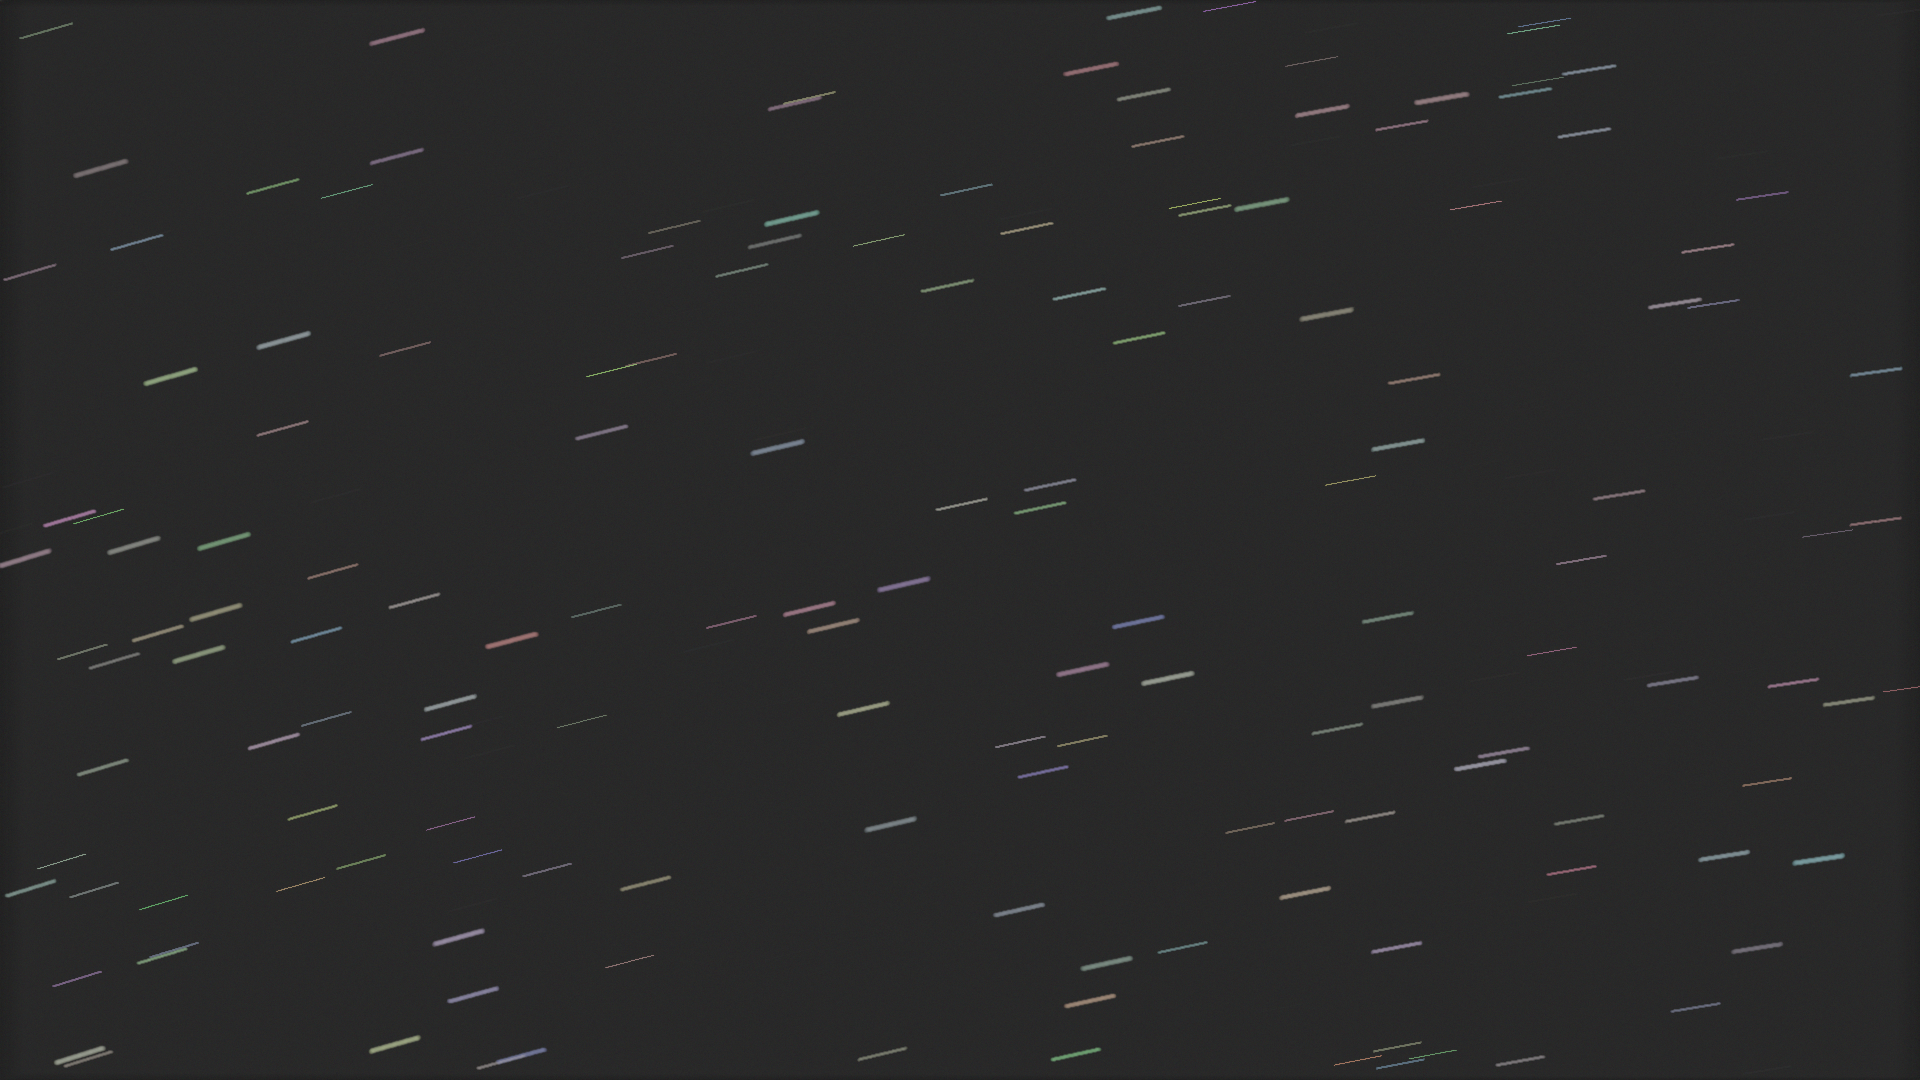

In [4]:
#CPU
def reduce(x):
    from numpy import log,exp
    x = x/256
    print('取log')
    x = (-log(1-x))/(log(2))
    print('取log1')
    x = x**3
    print('取mean')
    x = x.mean(0)
    print('取exp')
    x = 1-exp(-log(2)*x**(1/3))
    x = x * 256
    return x

final_img = reduce(final_img_double)
Image.fromarray(final_img.astype(np.uint8))

In [13]:
#CUDA
def reduce(x):
    from torch import log,exp,tensor
    import torch
    x = tensor(x)
    x = x.float().cuda(5)
    print(x.type())
    x = x/256
#     print('取log')
#     x = (-log(1-x))/(log(tensor(2.0)))
#     print('取log1')
#     x = x**3
#     print('取mean')
#     x = x.mean(0)
#     print('取exp')
#     x = 1-exp(-log(tensor(2.0))*x**(1/3))
#     x = x * 256
    return x

final_img = reduce(final_img_double)
# final_img = np.array(final_img.cpu())
# Image.fromarray(final_img.astype(np.uint8))

RuntimeError: CUDA out of memory. Tried to allocate 3.09 GiB (GPU 5; 10.76 GiB total capacity; 6.18 GiB already allocated; 1.12 GiB free; 6.18 GiB reserved in total by PyTorch)